# **Waste Classification Using ResNet50 (CNN)**


**This is Google Collab for Bangkit 2023 Product-based Capstone - TrashLine**

<table>
  <td>
    <a target="_blank" href="https://github.com/JokerXDexter/Capstone_Bangkit2023_TrashLine">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

**The following code will analyze Deep Learning Using the Transfer Learning Resnet50 (CNN) in classifying the type of waste organic [0] or inorganic [1]**

## Connect to Google Cloud (Optional)

Use this code if you want to connect your Google Colab with Google-Cloud-Storage For More Information Check this Website --> [PyPi](https://pypi.org/project/google-cloud-storage/). and [PyPi](https://pypi.org/project/split-folders/)

In [1]:
#Install Google-Cloud-Storage and Split Folders
!pip install google-cloud-storage
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.cloud import storage
from google.colab import auth

auth.authenticate_user()

In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2659  100  2659    0     0  51134      0 --:--:-- --:--:-- --:--:-- 51134
OK
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 14.0 MB of archives.
After this operation, 31.2 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.42.5_amd64.deb ...
Unpacking gcsfuse (0.42.5) ...
Setting up gcsfuse (0.42.5) ...


In [ ]:
#Create a directory
!mkdir colab_directory

In [ ]:
!gcsfuse --implicit-dirs trashline colab_directory

I0610 08:33:47.180000 2023/06/10 08:33:47.179980 Start gcsfuse/0.42.5 (Go version go1.20.3) for app "" using mount point: /content/colab_directory


In [ ]:
!ls colab_directory

anorganic  organic


In [ ]:
!ls colab_directory/anorganic

Streaming output truncated to the last 5000 lines.
TRAIN.2_NBIODEG_CCW_3067.jpg   TRAIN.4_NBIODEG_CWR_2029.jpg
TRAIN.2_NBIODEG_CCW_3068.jpg   TRAIN.4_NBIODEG_CWR_202.jpg
TRAIN.2_NBIODEG_CCW_3069.jpg   TRAIN.4_NBIODEG_CWR_2030.jpg
TRAIN.2_NBIODEG_CCW_306.jpg    TRAIN.4_NBIODEG_CWR_2031.jpg
TRAIN.2_NBIODEG_CCW_3070.jpg   TRAIN.4_NBIODEG_CWR_2032.jpg
TRAIN.2_NBIODEG_CCW_3071.jpg   TRAIN.4_NBIODEG_CWR_2033.jpg
TRAIN.2_NBIODEG_CCW_3072.jpg   TRAIN.4_NBIODEG_CWR_2034.jpg
TRAIN.2_NBIODEG_CCW_3073.jpg   TRAIN.4_NBIODEG_CWR_2035.jpg
TRAIN.2_NBIODEG_CCW_3074.jpg   TRAIN.4_NBIODEG_CWR_2036.jpg
TRAIN.2_NBIODEG_CCW_3075.jpg   TRAIN.4_NBIODEG_CWR_2037.jpg
TRAIN.2_NBIODEG_CCW_3076.jpg   TRAIN.4_NBIODEG_CWR_2038.jpg
TRAIN.2_NBIODEG_CCW_3077.jpg   TRAIN.4_NBIODEG_CWR_2039.jpg
TRAIN.2_NBIODEG_CCW_3078.jpg   TRAIN.4_NBIODEG_CWR_203.jpg
TRAIN.2_NBIODEG_CCW_3079.jpg   TRAIN.4_NBIODEG_CWR_2040.jpg
TRAIN.2_NBIODEG_CCW_307.jpg    TRAIN.4_NBIODEG_CWR_2041.jpg
TRAIN.2_NBIODEG_CCW_3080.jpg   TRAIN.4_NBIODEG_CWR_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!ls colab_directory/organic

Streaming output truncated to the last 5000 lines.
TRAIN.1_BIODEG_ORI_7819.jpg    TRAIN.4_BIODEG_ORI_15346.jpg
TRAIN.1_BIODEG_ORI_781.jpg     TRAIN.4_BIODEG_ORI_15347.jpg
TRAIN.1_BIODEG_ORI_7820.jpg    TRAIN.4_BIODEG_ORI_15348.jpg
TRAIN.1_BIODEG_ORI_7821.jpg    TRAIN.4_BIODEG_ORI_15349.jpg
TRAIN.1_BIODEG_ORI_7822.jpg    TRAIN.4_BIODEG_ORI_1534.jpg
TRAIN.1_BIODEG_ORI_7823.jpg    TRAIN.4_BIODEG_ORI_15350.jpg
TRAIN.1_BIODEG_ORI_7824.jpg    TRAIN.4_BIODEG_ORI_15351.jpg
TRAIN.1_BIODEG_ORI_7825.jpg    TRAIN.4_BIODEG_ORI_15352.jpg
TRAIN.1_BIODEG_ORI_7826.jpg    TRAIN.4_BIODEG_ORI_15353.jpg
TRAIN.1_BIODEG_ORI_7827.jpg    TRAIN.4_BIODEG_ORI_15354.jpg
TRAIN.1_BIODEG_ORI_7828.jpg    TRAIN.4_BIODEG_ORI_15355.jpg
TRAIN.1_BIODEG_ORI_7829.jpg    TRAIN.4_BIODEG_ORI_15356.jpg
TRAIN.1_BIODEG_ORI_782.jpg     TRAIN.4_BIODEG_ORI_15357.jpg
TRAIN.1_BIODEG_ORI_7830.jpg    TRAIN.4_BIODEG_ORI_15358.jpg
TRAIN.1_BIODEG_ORI_7831.jpg    TRAIN.4_BIODEG_ORI_15359.jpg
TRAIN.1_BIODEG_ORI_7832.jpg    TRAIN.4_BIODEG_ORI_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Connect to Google Drive

Use this code to connect your Google Colab with Google Drive

In [2]:
gcolab = 1
if gcolab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


## Import The Library/ Package

In [72]:
import os
import shutil
import splitfolders
import numpy as np
import seaborn as sns
import time
import pathlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

from glob import glob
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

## Data Preparation

In [ ]:
!unzip "/content/drive/My Drive/BangkitCapstoneProject/OandA3.zip" -d "/content/drive/My Drive/BangkitCapstoneProject/NewDataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_5499.jpg  
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_55.jpg  
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_550.jpg  
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_5500.jpg  
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_5501.jpg  
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_5502.jpg  
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_5503.jpg  
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_5504.jpg  
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_5505.jpg  
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_5506.jpg  
  inflating: /content/drive/My Drive/BangkitCapstoneProject/NewDataset/R/R_5507.jpg  
  infl

### Create a directory and Split it into Train And **Validation**

In [4]:
os.mkdir("./data waste/")

In [5]:
splitfolders.ratio("/content/drive/My Drive/BangkitCapstoneProject/NewDataset", output="./data waste/", seed=1337,  ratio=(.90, .10), group_prefix=None)

Copying files: 19999 files [08:17, 40.16 files/s] 


In [6]:
output_folder = "./data waste"

# Calculating the amount of training data
train_folder = os.path.join(output_folder, "train")
num_train_samples = sum(len(files) for _, _, files in os.walk(train_folder))

# Counting the number of validation data
val_folder = os.path.join(output_folder, "val")
num_val_samples = sum(len(files) for _, _, files in os.walk(val_folder))

# Display the number of training data and validation data
print("The amount of training data:", num_train_samples)
print("The amount of validation data:", num_val_samples)

The amount of training data: 17999
The amount of validation data: 2000


In [7]:
organic_train_dir = "./data waste/train/O"
anorganic_train_dir = "./data waste/train/R"

organic_val_dir = "./data waste/val/O"
anorganic_val_dir = "./data waste/val/R"

In [8]:
print('total training organic images :', len(os.listdir(      organic_train_dir) ))
print('total training anorganic images :', len(os.listdir(      anorganic_train_dir) ))

total training organic images : 9000
total training anorganic images : 8999


In [9]:
print('total validation organic images :', len(os.listdir(      organic_val_dir) ))
print('total validation anorganic images :', len(os.listdir(      anorganic_val_dir) ))

total validation organic images : 1000
total validation anorganic images : 1000


### Show example of Dataset

In [10]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Sample organic image:


<Figure size 640x480 with 0 Axes>

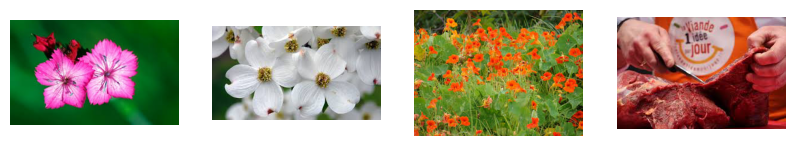

Sample anorganic image:


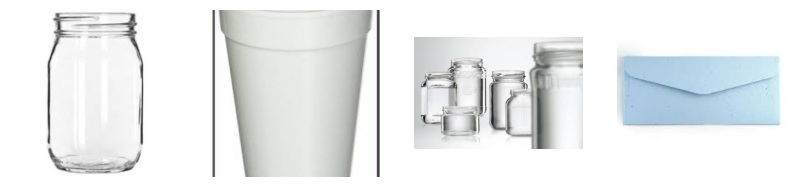

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
pic_index += 4

# organic
print("Sample organic image:")
next_organic_pic = [os.path.join(organic_train_dir, fname)
                         for fname in os.listdir(organic_train_dir)[pic_index-4:pic_index]]
fig = plt.figure(figsize=(10, 10))

for i, img_path in enumerate(next_organic_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Organic
print("Sample anorganic image:")
next_anorganic_pic = [os.path.join(anorganic_train_dir, fname)
                         for fname in os.listdir(anorganic_train_dir)[pic_index-4:pic_index]]
fig = plt.figure(figsize=(10, 10))

for i, img_path in enumerate(next_anorganic_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()



### Data Augumentation and Creating training and Validation training

In [30]:
Training_dir = './data waste/train'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(Training_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))


Validation_dir = './data waste/val'
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(Validation_dir,
                                                              batch_size=32,
                                                              class_mode  = 'categorical',
                                                              target_size = (224, 224))

Found 17998 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Data Model

### Create model Using Transfer Learning ResNet50

In [14]:
# Creating transfer learning with ResNet50 model
pre_trained_model_waste = ResNet50(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = "imagenet")

# Set the pre-trained layer to be untrainable
for layer in pre_trained_model_waste.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [17]:
pre_trained_model_waste.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Create a new Layer

In [20]:
x = Flatten()(pre_trained_model_waste.output)

In [40]:
prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=pre_trained_model_waste.input, outputs=prediction)

In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

### Create checkpoints to save models

In [27]:
# Settinging up checkpoints to save the best models been create

sourcedata = "/content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix"

if not os.path.exists(sourcedata):
    os.mkdir(sourcedata)

checkpoint = ModelCheckpoint(sourcedata, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

### Compile and Training The Model

In [43]:
optimizer = Adam(learning_rate=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# Perform iterations
callbacks_list = [checkpoint]
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=25, epochs=65, callbacks=[callbacks_list])

Epoch 1/65
25/25 [==============================] - ETA: 0s - loss: 0.7493 - accuracy: 0.4888
Epoch 1: val_accuracy improved from -inf to 0.47450, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 82s 3s/step - loss: 0.7493 - accuracy: 0.4888 - val_loss: 0.7225 - val_accuracy: 0.4745
Epoch 2/65
25/25 [==============================] - ETA: 0s - loss: 0.7186 - accuracy: 0.4462
Epoch 2: val_accuracy did not improve from 0.47450
25/25 [==============================] - 17s 667ms/step - loss: 0.7186 - accuracy: 0.4462 - val_loss: 0.7133 - val_accuracy: 0.4565
Epoch 3/65
25/25 [==============================] - ETA: 0s - loss: 0.7068 - accuracy: 0.4925
Epoch 3: val_accuracy did not improve from 0.47450
25/25 [==============================] - 17s 709ms/step - loss: 0.7068 - accuracy: 0.4925 - val_loss: 0.7123 - val_accuracy: 0.4650
Epoch 4/65
25/25 [==============================] - ETA: 0s - loss: 0.7034 - accuracy: 0.4675
Epoch 4: val_accuracy did not improve from 0.47450
25/25 [==============================] - 18s 720ms/step - loss: 0.7034 - accuracy: 0.4675 - val_loss: 0.7089 - val_accuracy: 0.4665
Epoch 5/65
25/25 [======================

25/25 [==============================] - 37s 2s/step - loss: 0.7078 - accuracy: 0.4725 - val_loss: 0.7048 - val_accuracy: 0.4760
Epoch 7/65
25/25 [==============================] - ETA: 0s - loss: 0.6968 - accuracy: 0.4850
Epoch 7: val_accuracy improved from 0.47600 to 0.49550, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 41s 2s/step - loss: 0.6968 - accuracy: 0.4850 - val_loss: 0.7033 - val_accuracy: 0.4955
Epoch 8/65
25/25 [==============================] - ETA: 0s - loss: 0.7042 - accuracy: 0.4850
Epoch 8: val_accuracy improved from 0.49550 to 0.50250, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 42s 2s/step - loss: 0.7042 - accuracy: 0.4850 - val_loss: 0.7013 - val_accuracy: 0.5025
Epoch 9/65
25/25 [==============================] - ETA: 0s - loss: 0.6977 - accuracy: 0.4950
Epoch 9: val_accuracy did not improve from 0.50250
25/25 [==============================] - 22s 882ms/step - loss: 0.6977 - accuracy: 0.4950 - val_loss: 0.6989 - val_accuracy: 0.4950
Epoch 10/65
25/25 [==============================] - ETA: 0s - loss: 0.6971 - accuracy: 0.5000
Epoch 10: val_accuracy improved from 0.50250 to 0.51200, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 38s 2s/step - loss: 0.6971 - accuracy: 0.5000 - val_loss: 0.6975 - val_accuracy: 0.5120
Epoch 11/65
25/25 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.5437
Epoch 11: val_accuracy improved from 0.51200 to 0.52900, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 39s 2s/step - loss: 0.6908 - accuracy: 0.5437 - val_loss: 0.6961 - val_accuracy: 0.5290
Epoch 12/65
25/25 [==============================] - ETA: 0s - loss: 0.6874 - accuracy: 0.5238
Epoch 12: val_accuracy improved from 0.52900 to 0.53550, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 38s 2s/step - loss: 0.6874 - accuracy: 0.5238 - val_loss: 0.6935 - val_accuracy: 0.5355
Epoch 13/65
25/25 [==============================] - ETA: 0s - loss: 0.6957 - accuracy: 0.5200
Epoch 13: val_accuracy improved from 0.53550 to 0.54400, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 39s 2s/step - loss: 0.6957 - accuracy: 0.5200 - val_loss: 0.6924 - val_accuracy: 0.5440
Epoch 14/65
25/25 [==============================] - ETA: 0s - loss: 0.6844 - accuracy: 0.5638
Epoch 14: val_accuracy improved from 0.54400 to 0.55300, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 43s 2s/step - loss: 0.6844 - accuracy: 0.5638 - val_loss: 0.6903 - val_accuracy: 0.5530
Epoch 15/65
25/25 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.5575
Epoch 15: val_accuracy improved from 0.55300 to 0.56400, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 38s 2s/step - loss: 0.6833 - accuracy: 0.5575 - val_loss: 0.6891 - val_accuracy: 0.5640
Epoch 16/65
25/25 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.5575
Epoch 16: val_accuracy improved from 0.56400 to 0.56700, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 42s 2s/step - loss: 0.6907 - accuracy: 0.5575 - val_loss: 0.6875 - val_accuracy: 0.5670
Epoch 17/65
25/25 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5263
Epoch 17: val_accuracy did not improve from 0.56700
25/25 [==============================] - 22s 902ms/step - loss: 0.6931 - accuracy: 0.5263 - val_loss: 0.6851 - val_accuracy: 0.5580
Epoch 18/65
25/25 [==============================] - ETA: 0s - loss: 0.6801 - accuracy: 0.5813
Epoch 18: val_accuracy improved from 0.56700 to 0.56800, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 43s 2s/step - loss: 0.6801 - accuracy: 0.5813 - val_loss: 0.6854 - val_accuracy: 0.5680
Epoch 19/65
25/25 [==============================] - ETA: 0s - loss: 0.6824 - accuracy: 0.5788
Epoch 19: val_accuracy improved from 0.56800 to 0.56900, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 38s 2s/step - loss: 0.6824 - accuracy: 0.5788 - val_loss: 0.6822 - val_accuracy: 0.5690
Epoch 20/65
25/25 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.5387
Epoch 20: val_accuracy improved from 0.56900 to 0.58100, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 42s 2s/step - loss: 0.6877 - accuracy: 0.5387 - val_loss: 0.6808 - val_accuracy: 0.5810
Epoch 21/65
25/25 [==============================] - ETA: 0s - loss: 0.6761 - accuracy: 0.6237
Epoch 21: val_accuracy improved from 0.58100 to 0.59000, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 41s 2s/step - loss: 0.6761 - accuracy: 0.6237 - val_loss: 0.6794 - val_accuracy: 0.5900
Epoch 22/65
25/25 [==============================] - ETA: 0s - loss: 0.6747 - accuracy: 0.5725
Epoch 22: val_accuracy did not improve from 0.59000
25/25 [==============================] - 22s 889ms/step - loss: 0.6747 - accuracy: 0.5725 - val_loss: 0.6781 - val_accuracy: 0.5785
Epoch 23/65
25/25 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.5700
Epoch 23: val_accuracy improved from 0.59000 to 0.59750, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 38s 2s/step - loss: 0.6782 - accuracy: 0.5700 - val_loss: 0.6770 - val_accuracy: 0.5975
Epoch 24/65
25/25 [==============================] - ETA: 0s - loss: 0.6737 - accuracy: 0.5962
Epoch 24: val_accuracy did not improve from 0.59750
25/25 [==============================] - 20s 826ms/step - loss: 0.6737 - accuracy: 0.5962 - val_loss: 0.6763 - val_accuracy: 0.5955
Epoch 25/65
25/25 [==============================] - ETA: 0s - loss: 0.6763 - accuracy: 0.5800
Epoch 25: val_accuracy improved from 0.59750 to 0.59800, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 37s 2s/step - loss: 0.6763 - accuracy: 0.5800 - val_loss: 0.6741 - val_accuracy: 0.5980
Epoch 26/65
25/25 [==============================] - ETA: 0s - loss: 0.6631 - accuracy: 0.6388
Epoch 26: val_accuracy improved from 0.59800 to 0.60750, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 42s 2s/step - loss: 0.6631 - accuracy: 0.6388 - val_loss: 0.6731 - val_accuracy: 0.6075
Epoch 27/65
25/25 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.6263
Epoch 27: val_accuracy improved from 0.60750 to 0.60800, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 36s 1s/step - loss: 0.6651 - accuracy: 0.6263 - val_loss: 0.6712 - val_accuracy: 0.6080
Epoch 28/65
25/25 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.5788
Epoch 28: val_accuracy did not improve from 0.60800
25/25 [==============================] - 22s 890ms/step - loss: 0.6785 - accuracy: 0.5788 - val_loss: 0.6701 - val_accuracy: 0.6060
Epoch 29/65
25/25 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.6037
Epoch 29: val_accuracy improved from 0.60800 to 0.61350, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 39s 2s/step - loss: 0.6728 - accuracy: 0.6037 - val_loss: 0.6688 - val_accuracy: 0.6135
Epoch 30/65
25/25 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.6025
Epoch 30: val_accuracy improved from 0.61350 to 0.61800, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 42s 2s/step - loss: 0.6703 - accuracy: 0.6025 - val_loss: 0.6675 - val_accuracy: 0.6180
Epoch 31/65
25/25 [==============================] - ETA: 0s - loss: 0.6714 - accuracy: 0.6187
Epoch 31: val_accuracy improved from 0.61800 to 0.61950, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 41s 2s/step - loss: 0.6714 - accuracy: 0.6187 - val_loss: 0.6662 - val_accuracy: 0.6195
Epoch 32/65
25/25 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.5975
Epoch 32: val_accuracy did not improve from 0.61950
25/25 [==============================] - 22s 884ms/step - loss: 0.6727 - accuracy: 0.5975 - val_loss: 0.6663 - val_accuracy: 0.6180
Epoch 33/65
25/25 [==============================] - ETA: 0s - loss: 0.6672 - accuracy: 0.6225
Epoch 33: val_accuracy did not improve from 0.61950
25/25 [==============================] - 18s 722ms/step - loss: 0.6672 - accuracy: 0.6225 - val_loss: 0.6639 - val_accuracy: 0.6170
Epoch 34/65
25/25 [==============================] - ETA: 0s - loss: 0.6679 - accuracy: 0.6087
Epoch 34: val_accuracy improved from 0.61950 to 0.62000, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 39s 2s/step - loss: 0.6679 - accuracy: 0.6087 - val_loss: 0.6628 - val_accuracy: 0.6200
Epoch 35/65
25/25 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.6300
Epoch 35: val_accuracy improved from 0.62000 to 0.62450, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 41s 2s/step - loss: 0.6667 - accuracy: 0.6300 - val_loss: 0.6630 - val_accuracy: 0.6245
Epoch 36/65
25/25 [==============================] - ETA: 0s - loss: 0.6622 - accuracy: 0.6137
Epoch 36: val_accuracy improved from 0.62450 to 0.63250, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 39s 2s/step - loss: 0.6622 - accuracy: 0.6137 - val_loss: 0.6608 - val_accuracy: 0.6325
Epoch 37/65
25/25 [==============================] - ETA: 0s - loss: 0.6627 - accuracy: 0.6037
Epoch 37: val_accuracy did not improve from 0.63250
25/25 [==============================] - 18s 738ms/step - loss: 0.6627 - accuracy: 0.6037 - val_loss: 0.6598 - val_accuracy: 0.6250
Epoch 38/65
25/25 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.6225
Epoch 38: val_accuracy did not improve from 0.63250
25/25 [==============================] - 18s 721ms/step - loss: 0.6667 - accuracy: 0.6225 - val_loss: 0.6599 - val_accuracy: 0.6165
Epoch 39/65
25/25 [==============================] - ETA: 0s - loss: 0.6579 - accuracy: 0.6237
Epoch 39: val_accuracy did not improve from 0.63250
25/25 [==============================] - 16s 663ms/step - loss: 0.6579 - accuracy: 0.6237 - val_loss: 0.6592 - val_accuracy: 0.6180
Epoch 40/65
25/25 [===============

25/25 [==============================] - 39s 2s/step - loss: 0.6615 - accuracy: 0.6012 - val_loss: 0.6566 - val_accuracy: 0.6350
Epoch 41/65
25/25 [==============================] - ETA: 0s - loss: 0.6586 - accuracy: 0.6212
Epoch 41: val_accuracy did not improve from 0.63500
25/25 [==============================] - 18s 744ms/step - loss: 0.6586 - accuracy: 0.6212 - val_loss: 0.6558 - val_accuracy: 0.6325
Epoch 42/65
25/25 [==============================] - ETA: 0s - loss: 0.6583 - accuracy: 0.6150
Epoch 42: val_accuracy did not improve from 0.63500
25/25 [==============================] - 22s 882ms/step - loss: 0.6583 - accuracy: 0.6150 - val_loss: 0.6554 - val_accuracy: 0.6255
Epoch 43/65
25/25 [==============================] - ETA: 0s - loss: 0.6528 - accuracy: 0.6325
Epoch 43: val_accuracy did not improve from 0.63500
25/25 [==============================] - 18s 738ms/step - loss: 0.6528 - accuracy: 0.6325 - val_loss: 0.6545 - val_accuracy: 0.6275
Epoch 44/65
25/25 [===============

25/25 [==============================] - 39s 2s/step - loss: 0.6603 - accuracy: 0.5987 - val_loss: 0.6531 - val_accuracy: 0.6410
Epoch 45/65
25/25 [==============================] - ETA: 0s - loss: 0.6562 - accuracy: 0.6450
Epoch 45: val_accuracy did not improve from 0.64100
25/25 [==============================] - 18s 734ms/step - loss: 0.6562 - accuracy: 0.6450 - val_loss: 0.6525 - val_accuracy: 0.6335
Epoch 46/65
25/25 [==============================] - ETA: 0s - loss: 0.6486 - accuracy: 0.6413
Epoch 46: val_accuracy did not improve from 0.64100
25/25 [==============================] - 22s 886ms/step - loss: 0.6486 - accuracy: 0.6413 - val_loss: 0.6513 - val_accuracy: 0.6385
Epoch 47/65
25/25 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.6388
Epoch 47: val_accuracy did not improve from 0.64100
25/25 [==============================] - 17s 705ms/step - loss: 0.6523 - accuracy: 0.6388 - val_loss: 0.6505 - val_accuracy: 0.6350
Epoch 48/65
25/25 [===============

25/25 [==============================] - 41s 2s/step - loss: 0.6538 - accuracy: 0.6338 - val_loss: 0.6496 - val_accuracy: 0.6420
Epoch 49/65
25/25 [==============================] - ETA: 0s - loss: 0.6410 - accuracy: 0.6600
Epoch 49: val_accuracy improved from 0.64200 to 0.64450, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 42s 2s/step - loss: 0.6410 - accuracy: 0.6600 - val_loss: 0.6487 - val_accuracy: 0.6445
Epoch 50/65
25/25 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.6275
Epoch 50: val_accuracy improved from 0.64450 to 0.64950, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 43s 2s/step - loss: 0.6551 - accuracy: 0.6275 - val_loss: 0.6478 - val_accuracy: 0.6495
Epoch 51/65
25/25 [==============================] - ETA: 0s - loss: 0.6462 - accuracy: 0.6413
Epoch 51: val_accuracy did not improve from 0.64950
25/25 [==============================] - 17s 690ms/step - loss: 0.6462 - accuracy: 0.6413 - val_loss: 0.6479 - val_accuracy: 0.6360
Epoch 52/65
25/25 [==============================] - ETA: 0s - loss: 0.6572 - accuracy: 0.6100
Epoch 52: val_accuracy did not improve from 0.64950
25/25 [==============================] - 18s 732ms/step - loss: 0.6572 - accuracy: 0.6100 - val_loss: 0.6467 - val_accuracy: 0.6380
Epoch 53/65
25/25 [==============================] - ETA: 0s - loss: 0.6382 - accuracy: 0.6600
Epoch 53: val_accuracy improved from 0.64950 to 0.65000, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 39s 2s/step - loss: 0.6382 - accuracy: 0.6600 - val_loss: 0.6455 - val_accuracy: 0.6500
Epoch 54/65
25/25 [==============================] - ETA: 0s - loss: 0.6499 - accuracy: 0.6325
Epoch 54: val_accuracy did not improve from 0.65000
25/25 [==============================] - 18s 729ms/step - loss: 0.6499 - accuracy: 0.6325 - val_loss: 0.6447 - val_accuracy: 0.6415
Epoch 55/65
25/25 [==============================] - ETA: 0s - loss: 0.6515 - accuracy: 0.6338
Epoch 55: val_accuracy improved from 0.65000 to 0.65100, saving model to /content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix


25/25 [==============================] - 38s 2s/step - loss: 0.6515 - accuracy: 0.6338 - val_loss: 0.6440 - val_accuracy: 0.6510
Epoch 56/65
25/25 [==============================] - ETA: 0s - loss: 0.6332 - accuracy: 0.6463
Epoch 56: val_accuracy did not improve from 0.65100
25/25 [==============================] - 18s 732ms/step - loss: 0.6332 - accuracy: 0.6463 - val_loss: 0.6435 - val_accuracy: 0.6420
Epoch 57/65
25/25 [==============================] - ETA: 0s - loss: 0.6416 - accuracy: 0.6525
Epoch 57: val_accuracy did not improve from 0.65100
25/25 [==============================] - 19s 751ms/step - loss: 0.6416 - accuracy: 0.6525 - val_loss: 0.6426 - val_accuracy: 0.6420
Epoch 58/65
25/25 [==============================] - ETA: 0s - loss: 0.6520 - accuracy: 0.6363
Epoch 58: val_accuracy did not improve from 0.65100
25/25 [==============================] - 16s 659ms/step - loss: 0.6520 - accuracy: 0.6363 - val_loss: 0.6418 - val_accuracy: 0.6490
Epoch 59/65
25/25 [===============

25/25 [==============================] - 41s 2s/step - loss: 0.6421 - accuracy: 0.6450 - val_loss: 0.6408 - val_accuracy: 0.6595
Epoch 61/65
25/25 [==============================] - ETA: 0s - loss: 0.6277 - accuracy: 0.6787
Epoch 61: val_accuracy did not improve from 0.65950
25/25 [==============================] - 18s 722ms/step - loss: 0.6277 - accuracy: 0.6787 - val_loss: 0.6397 - val_accuracy: 0.6515
Epoch 62/65
25/25 [==============================] - ETA: 0s - loss: 0.6379 - accuracy: 0.6637
Epoch 62: val_accuracy did not improve from 0.65950
25/25 [==============================] - 17s 688ms/step - loss: 0.6379 - accuracy: 0.6637 - val_loss: 0.6391 - val_accuracy: 0.6535
Epoch 63/65
25/25 [==============================] - ETA: 0s - loss: 0.6283 - accuracy: 0.6812
Epoch 63: val_accuracy did not improve from 0.65950
25/25 [==============================] - 18s 716ms/step - loss: 0.6283 - accuracy: 0.6812 - val_loss: 0.6386 - val_accuracy: 0.6455
Epoch 64/65
25/25 [===============

### See the result of the Model Training

Text(0.5, 1.0, 'Training and validation loss')

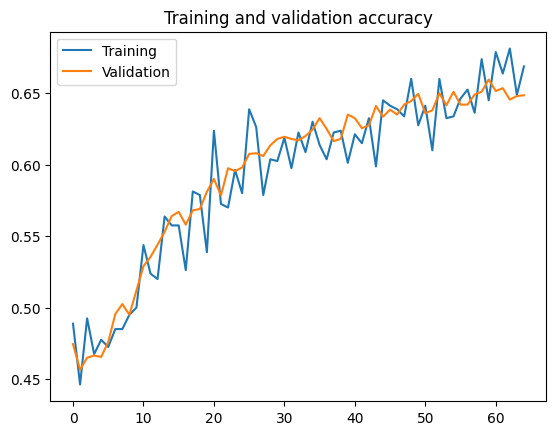

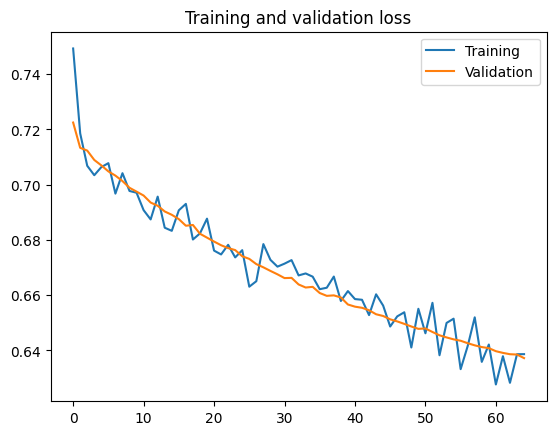

In [45]:
# Retrieve a list of list results on training and test data #
# sets for each training epoch                                         #
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss'   )

## Testing and Load the Model


### Testing The Model


In [94]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  x /= 255.0
  prob = model.predict(x)
  classes = np.argmax(prob)

  print(classes)

  if classes == 0:
      print("Ini adalah Sampah Organic")
  else:
      print("Ini adalah Sampah Anorganic")


Saving R_10856.jpg to R_10856.jpg
1/1 [==============================] - 0s 25ms/step
1
Ini adalah Sampah Anorganic


### Load Model That has been save

In [46]:
#LoadCheckpoint
model.load_weights('/content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix')

In [47]:
model.evaluate(validation_generator)

63/63 [==============================] - 7s 107ms/step - loss: 0.6408 - accuracy: 0.6595


[0.6408177614212036, 0.659500002861023]

In [ ]:
#Load Model
from tensorflow.keras.models import load_model
model=load_model("/content/drive/MyDrive/BangkitCapstoneProject/NewDataset/OrandAn.h5")

## Save Model

In [75]:
#Save model to .h5 Format
saved_model_path = "/content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/OrandAn.h5"

model.save(saved_model_path)

In [78]:
#Save model to Tflite Format
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/checkpoint_fix")
tflite_model = converter.convert()

In [90]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

94763940

In [88]:
#Upload It To Google Drive
shutil.copy("/content/model.tflite","/content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/")

'/content/drive/MyDrive/BangkitCapstoneProject/NewDatasetcheckpoint/model.tflite'

## Other Tools

In [69]:
# To remove a directory

folder_path = "/content/saved_model"
shutil.rmtree(folder_path)